- Pytorch提供了许多工具来简化和希望数据加载，使代码更具可读性。这里将专门讲述transforms数据预处理方法，即数据增强。
- 数据增强又称为数据增广、数据扩增，它是对训练集进行变换，使训练集更丰富，从而让模型更具泛化能力。

In [ ]:
# 在进行下面代码学习前需要安装torchvision==0.8.2
!pip install torchvision==0.8.2 --user

- pip安装包后，如果导入过程还出错，建议尝试重启kernel或刷新页面，如下图所示
<center><img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161025186375997131610251862434.png" width=50%></center>
- 任意在网上下载一张关于小喵咪的图片上传到天池实验室DSW上，如下图所示
<center><img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/162028081955662241620280818909.png" width=50%></center>

In [18]:
from PIL import Image
from torchvision import transforms as T
import torch as t

to_tensor = T.ToTensor()
to_pil = T.ToPILImage()
cat = Image.open('./cat.jpeg')  # 从网上下载图片到本地后，再上传至DSW

# transforms——Crop
1. torchvision.transforms.CenterCrop(size)
    - 功能：从图像中心裁剪图片
        - size：所需裁剪图片尺寸
2. torchvision.transforms.RandomCrop(size, padding=None, pad_tf_needed=False, fill=0, padding_mode='constant')
    - 功能：从图片中随机裁剪出尺寸为size的图片
        - size: 所需裁剪图片尺寸
        - padding: 设置填充大小
            - 当为a时，上下左右均填充a个像素；
            - 当为(a, b)时，上下填充b个像素，左右填充a个像素；
            - 当为(a, b, c, d)时，左、上、右、下分别填充a、b、c、d。
        - pad_if_need: 若图像小于设定size，则填充
        - padding_mode: 填充模式，有4种模式  
            ⅰ. constant： 像素值由fill设定  
            ⅱ. edge: 像素值由图像边缘像素设定  
            ⅲ. reflect: 镜像填充，最后一个像素不镜像，例: $[1, 2, 3, 4]→[3, 2, 1, 2, 3, 4, 3, 2]$  
            ⅳ. symmetric: 镜像填充，最后一个像素镜像，例：$[1, 2, 3, 4]→[2, 1, 1, 2, 3, 4, 4, 3]$  
        - fill: constant时，设置填充的像素值
3. torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(3/4, 4/3), interpolation=2)
    - 功能：随机大小、长宽比裁剪图片
        - size: 所需裁剪图片尺寸
        - scale: 随机裁剪面积比例，默认（0.08, 1）
        - ratio: 随机长宽比，默认（3/4, 4/3）
        - interpolation: 插值方法
            - PIL.Image.NEAREST
            - PIL.Image.BILINEAR
            - PIL.Image.BICUBIC
4. torchvision.transforms.FiveCrop(size)
5. torchvision.transforms.TenCrop(size, vertical_flip=False)
    - 功能：在图像的上下左右以及中心裁剪出尺寸为size的5张图片，TenCrop对这5张图片进行水平或者垂直镜像获得10张图片
        - size: 所需裁剪图片尺寸
        - vertical_flip: 是否垂直翻转

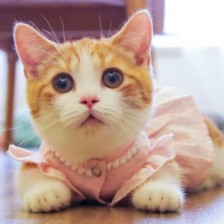

In [21]:
# torchvision.transforms.CenterCrop
transforms = T.Compose([T.Resize(224),T.CenterCrop(224),T.ToTensor()])  # Resize：缩放
cat_t = transforms(cat)  # 传入transforms中的数据是PIL数据，lena_t为tensor
cat_t.shape  # 3*224*224 ; 当T.CenterCrop()的参数大于T.Resize()的参数时，周围用0填充
to_pil(cat_t)

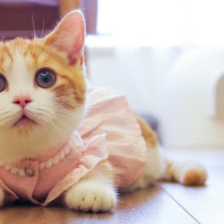

In [22]:
# torchvision.transforms.RandomCrop
transforms = T.Compose([T.Resize(224),T.RandomCrop(224, padding=(16, 64)),T.ToTensor()])  # Resize：缩放
cat_t = transforms(cat)  # 传入transforms中的数据是PIL数据，lena_t为tensor
cat_t.shape  # 3*224*224 ; 当T.CenterCrop()的参数大于T.Resize()的参数时，周围用0填充
to_pil(cat_t)

# transforms——Flip
1. torchvision.transforms.RandomHorizontalFlip(p=0.5)
2. torchvision.transforms.RandomVerticalFlip(p=0.5)
    - 功能：依据水平（左右）或垂直（上下）翻转图片
        - p: 翻转概率
3. torchvision.transforms.RandomRotation(degrees, resample=False, expand=False, center=None)
    - 功能：随机旋转图片
        - degrees: 旋转角度
            - 当为a时，在(-a, a)之间选择旋转角度；
            - 当为(a, b)时，在(a, b)之间选择旋转角度。
        - resample: 重采样方法
        - expand: 是否扩大图片，以保持原图信息

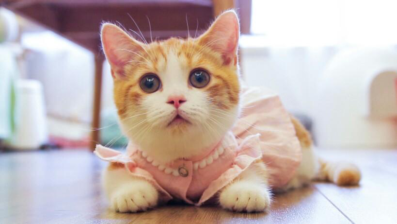

In [23]:
# torchvision.transforms.RandomHorizontalFlip
transforms = T.Compose([T.Resize(224),T.RandomHorizontalFlip(p=0.5),T.ToTensor()])  # Resize：缩放
cat_t = transforms(cat)  # 传入transforms中的数据是PIL数据，lena_t为tensor
cat_t.shape  # 3*224*224 ; 当T.CenterCrop()的参数大于T.Resize()的参数时，周围用0填充
to_pil(cat_t)

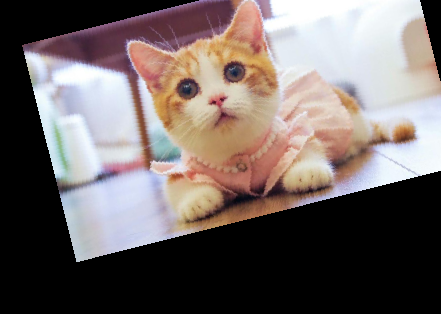

In [24]:
# torchvision.transforms.RandomRotation
transforms = T.Compose([T.Resize(224),T.RandomRotation(30, center=(0, 0), expand=True),T.ToTensor()])  # Resize：缩放
cat_t = transforms(cat)  # 传入transforms中的数据是PIL数据，lena_t为tensor
cat_t.shape  # 3*224*224 ; 当T.CenterCrop()的参数大于T.Resize()的参数时，周围用0填充
to_pil(cat_t)

# 图像变换
1. torchvision.transforms.Pad(padding, fill=0, padding_mode='constant')
    - 功能：对图像边缘进行填充
        - padding: 设置填充大小
            - 当为a时，上下左右均填充a个像素；
            - 当为(a, b)时，上下填充b个像素，左右填充a个像素；
            - 当为(a, b, c, d)时，左、上、右、下分别填充a、b、c、d。
        - padding_mode: 填充模式，有4种模式，constant、edge、reflect和symmetric
        - fill: constant时，设置填充的像素值，（R, G, B）or（Gray）
2. torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)
    - 功能：调整亮度、对比度、饱和度和色相
        - brightness: 亮度调整因子
            - 当为a时，从$[max(0, 1-a), 1+a]$中随机选择；
            - 当为（a, b）时，从$[a, b]$中随机选择。
        - contrast: 对比度参数，同brightness
        - saturation: 饱和度参数，同brightness
        - hue: 色相参数
            - 当为a时，从$[-a, a]$中选择参数，注：$0 \leq a \leq 0.5$
            - 当为(a, b)时，从$[a, b]$中选择参数，注：$-0.5 \leq a \leq b \leq 0.5$
3. torchvision.transforms.Grayscale(num_output_channels=1)
4. torchvision.transforms.RandomGrayscale(p=0.1)
    - 功能: 依概率将图片转换为灰度图
        - num_output_channels: 输出通道数，只能设置为1或3
        - p: 概率值，图像被转换为灰度图的概率
5. torchvision.transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, resample=0, fillcolor=0)
    - 功能：对图像进行仿射变换，仿射变换是二维的线性变换，由五种基本原子变换构成，分别是旋转、平移、缩放、错切和翻转
        - degrees: 旋转角度设置
        - translate: 平移区间设置，如(a, b)，a设置宽(width)，b设置高(height)，图像在宽维度平移区间为 -img_width  a < dx < img_width  a
        - scale: 缩放比例（以面积为单位）
        - fill_color: 填充颜色设置
        - shear: 错切角度设置，有水平错切和垂直错切
            - 若为a，则仅在x轴错切，错切角度在(-a, a)之间；
            - 若为(a, b)，则a设置x轴角度，b设置y的角度；
            - 若为(a, b, c, d)，则a、b设置x轴角度，c、d设置y轴角度。
        - resample: 重采样方式，有NEAREST、BILINEAR、BICUBIC
6. torchvision.transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
    - 功能：对图像进行随机遮挡
        - p: 概率值，执行该操作的概率
        - scale: 遮挡区域的面积
        - ratio: 遮挡区域长宽比
        - value: 设置遮挡区域的像素值，（R, G, B）or（Gray）
        - 参考文献：《Random Erasing Data Augmentaion》
7. torchvision.transforms.Lambda(lambd)
    - 功能: 用户自定义lambda方法
        - lambd: lambda匿名函数
        - 例如：transforms.Lambda(lambda crops: torch.stack([transforms.Totensor()(crop) for crop in crops]))

# transforms的操作
1. torchvision.transforms.RandomChoice(transforms)
    - 功能: 从一系列transforms方法中随机挑选一个
2. torchvision.transforms.RandomApply(transforms, p=0.5)
    - 功能: 依据概率执行一组transforms操作
3. torchvision.transforms.RandomOrder(transforms)
    - 功能: 对一组transforms操作打乱顺序

# 自定义transforms
自定义transforms要素：
1. 仅接收一个参数，返回一个参数
2. 注意上下游的输出与输入

In [2]:
class Compose(object):
    def __call__(self, img):
        for t in transforms:
            img = t(img)
        return img

通过类实现多参数传入：

In [3]:
class YourTransforms(object):
    def __init__(self, transforms):
        self.transforms = transforms
    def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img

椒盐噪声又称为脉冲噪声，是一种随机出现的白点或者黑点，白点称为盐噪声，黑色为椒噪声。  
信噪比（Signal-Noise Rate，SNR）是衡量噪声的比例，图像中为图像像素的占比。

In [4]:
class AddPepperNoise(object):
    def __init__(self, snr, p):
        self.snr = snr
        self.p = p
    def __call__(self, img):
        # 添加椒盐噪声具体实现过程
        img = None
        return img

# transforms方法
1. 裁剪  
    a. transforms.CenterCrop  
    b. transforms.RandomCrop  
    c. transforms.RandomResizedCrop  
    d. transforms.FiveCrop  
    e. transforms.TenCrop  
2. 翻转和旋转  
    a. transforms.RandomHorizontalFlip  
    b. transforms.RandomVerticalFlip  
    c. transforms.RandomRotation  
3. 图像变换  
    a. transforms.Pad  
    b. transforms.ColorJitter  
    c. transforms.Grayscale  
    d. transforms.RandomGrayscale  
    e. transforms.RandomAffine  
    f. transforms.LinearTransformation   
    g. transforms.RandomErasing  
    h. transforms.Lambda  
    i. transforms.Resize  
    j. transforms.Totensor  
    k. transforms.Normalize  
4. transforms的操作  
    a. transforms.RandomChoice  
    b. transforms.RandomApply  
    c. transforms.RandomOrder  

# 练习题
torchvision包提供了常用的数据集类（datasets）和转换（transforms）。利用这些你可以完成创建一个数据加载器（dataloader）。